### Example Data Science Project

Let's use pandas to analyze data from the Utah Avalanche Center. 

In [4]:
import pandas as pd


df = pd.read_csv('ava-all.csv')
df.dtypes

Unnamed: 0                           int64
Accident and Rescue Summary:        object
Aspect:                             object
Avalanche Problem:                  object
Avalanche Type:                     object
Buried - Fully:                    float64
Buried - Partly:                   float64
Carried:                           float64
Caught:                            float64
Comments:                           object
Coordinates:                        object
Depth:                              object
Elevation:                          object
Injured:                           float64
Killed:                              int64
Location Name or Route:             object
Observation Date:                   object
Observer Name:                      object
Occurence Time:                     object
Occurrence Date:                    object
Region:                             object
Slope Angle:                       float64
Snow Profile Comments:              object
Terrain Sum

We can see that the dataset is huge, and contain numeric data as well as strings (with `dtype=object`). The dates are generally not read as such, and we'll need to convert those.

### Describing Data

Let's check the size of the dataset:

In [5]:
df.shape

(92, 38)

Not bad, 92 rows and 38 coluns. Next let's grab some summary statistics:

In [6]:
df.describe()

,Unnamed: 0,Buried - Fully:,Buried - Partly:,Carried:,Caught:,Injured:,Killed:,Slope Angle:,Video:,killed
count,92.00000,64.000000,22.000000,71.000000,72.000000,5.0,92.000000,42.000000,0.0,92.000000
mean,45.50000,1.156250,1.090909,1.591549,1.638889,1.0,1.163043,37.785714,NaN,1.163043
std,26.70206,0.365963,0.294245,1.049863,1.091653,0.0,0.475260,5.567921,NaN,0.475260
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,10.000000,NaN,1.000000
25%,22.75000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,36.000000,NaN,1.000000
50%,45.50000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,38.000000,NaN,1.000000
75%,68.25000,1.000000,1.000000,2.000000,2.000000,1.0,1.000000,40.000000,NaN,1.000000
max,91.00000,2.000000,2.000000,7.000000,7.000000,1.0,4.000000,50.000000,NaN,4.000000


Based on this, already we know that there were 64 avalanches that had people buried. The avergae number of people buried was 1.15, with a minimum of 1 person and a maximum of 2. We can also tell that there are many `NaN` values, although we aren't sure what that means. One way to check is to drop all the `NaN` values, then generate the summary statistics again:

In [7]:
df.fillna(0).describe()

,Unnamed: 0,Buried - Fully:,Buried - Partly:,Carried:,Caught:,Injured:,Killed:,Slope Angle:,Video:,killed
count,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.000000
mean,45.50000,0.804348,0.260870,1.228261,1.282609,0.054348,1.163043,17.250000,0.0,1.163043
std,26.70206,0.615534,0.488765,1.139725,1.179738,0.227945,0.475260,19.289936,0.0,0.475260
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
25%,22.75000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000
50%,45.50000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000
75%,68.25000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,37.000000,0.0,1.000000
max,91.00000,2.000000,2.000000,7.000000,7.000000,1.000000,4.000000,50.000000,0.0,4.000000


Now the average number of people burried dropped to 0.8. This might alert us to check with someone in the know to better interpret the `NaN` values. 

Now, we can clean up the appearance of the DataFrame by replacing all the colons in the column labels with nothing:

In [9]:
df = df.rename(columns={x: x.replace(':', '') for x in df.columns})

df.describe()

,Unnamed 0,Buried - Fully,Buried - Partly,Carried,Caught,Injured,Killed,Slope Angle,Video,killed
count,92.00000,64.000000,22.000000,71.000000,72.000000,5.0,92.000000,42.000000,0.0,92.000000
mean,45.50000,1.156250,1.090909,1.591549,1.638889,1.0,1.163043,37.785714,NaN,1.163043
std,26.70206,0.365963,0.294245,1.049863,1.091653,0.0,0.475260,5.567921,NaN,0.475260
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,10.000000,NaN,1.000000
25%,22.75000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,36.000000,NaN,1.000000
50%,45.50000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,38.000000,NaN,1.000000
75%,68.25000,1.000000,1.000000,2.000000,2.000000,1.0,1.000000,40.000000,NaN,1.000000
max,91.00000,2.000000,2.000000,7.000000,7.000000,1.0,4.000000,50.000000,NaN,4.000000


### Categorical Data

There are many columns that didn't appear in the `.describe()` output table because they do not contain numerical values. These categorical data are important and we can inspect them with the `.value_counts()` method:

In [11]:
df.loc[:, 'Aspect'].value_counts() # Recall that this generate a text-based "histogram" of sorts

Northeast    24
North        14
East          9
Northwest     9
Southeast     3
West          3
South         1
Name: Aspect, dtype: int64

In [12]:
df.loc[:, 'Avalanche Type'].value_counts()

Hard Slab       27
Soft Slab       24
Cornice Fall     1
Wet Slab         1
Name: Avalanche Type, dtype: int64

It seems that there are missing values in these categorical columns as well. We can check clearly by summing the counts:

In [14]:
df.loc[:, 'Avalanche Type'].value_counts().sum()

53

### Converting Column Types

The "Depth" column should have been numeric but didn't show up in the `.describe()` table. Why is that?

In [15]:
df.loc[:, 'Depth'].head(15)

0       3'
1       4'
2       4'
3      18"
4       8"
5       2'
6       3'
7       2'
8      16"
9       3'
10    2.5'
11     16"
12     NaN
13    3.5'
14      8'
Name: Depth, dtype: object

So this is why, the feet and inch (') symbols were added and that messed up Python and pandas ability to recognize these values as numerics. The best way to deal with data that are this messy is via regular expression:

In [16]:
import re


def to_inches(orig):
    txt = str(orig)
    if txt == 'nan':
        return orig
    reg = r'''(((\d*\.)?\d*)')?(((\d*\.)?\d*)")?'''
    mo = re.search(reg, txt)
    feet = mo.group(2) or 0
    inches = mo.group(5) or 0
    return float(feet) * 12 + float(inches)

The above function returns `NaN` if that is what's in the depth entry. Otherwise it looks for optional feed (numbers followed by ') and optional inches (numbers followed by ''), then it computes and convert it into total inches.

In [17]:
df.loc[:, 'depth_inches'] = df.loc[:, 'Depth'].apply(to_inches)

df.loc[:, 'depth_inches'].describe()

count    61.000000
mean     32.573770
std      17.628064
min       0.000000
25%      24.000000
50%      30.000000
75%      42.000000
max      96.000000
Name: depth_inches, dtype: float64

We're almost there; there are still a lot of missing values. Let's fill them with the median depth:

In [18]:
df.loc[:, 'depth_inches'] = df.loc[:, 'depth_inches'].fillna(df.loc[:, 'depth_inches'].median())

df.loc[:, 'depth_inches'].describe()

count    92.000000
mean     31.706522
std      14.366122
min       0.000000
25%      24.000000
50%      30.000000
75%      36.000000
max      96.000000
Name: depth_inches, dtype: float64

Another column that pandas misinterpreted as non-numeric is the "Vertical" column:

In [19]:
df.loc[:, 'Vertical'].head(15)

0        1500
1         200
2         175
3         125
4        1500
5         250
6          50
7        1000
8         600
9         350
10       2500
11        800
12        900
13    Unknown
14       1000
Name: Vertical, dtype: object

This is much easier, as pandas is simply treating the whole column as strings (because of the "Unknown" entries). We can simply use the `to_numeric()` function while passing `errors='coerce'` to convert all "Unknown" to `NaN`:

In [21]:
df.loc[:, 'vert'] = pd.to_numeric(df.loc[:, 'Vertical'], errors='coerce')

df.loc[:, 'vert']

0     1500.0
1      200.0
2      175.0
3      125.0
4     1500.0
       ...  
87       NaN
88    1500.0
89     300.0
90    1250.0
91    1250.0
Name: vert, Length: 92, dtype: float64

### Dealing with Datas

There are date entries in the DataFrame:

In [22]:
df.loc[:, 'Occurrence Date'].head()

0      Wednesday, March 4, 2015
1         Friday, March 7, 2014
2      Sunday, February 9, 2014
3    Saturday, February 8, 2014
4      Thursday, April 11, 2013
Name: Occurrence Date, dtype: object

The `dtype` of this column is `object`, which mean these are strings, and need to be converted to datetime datatype for Python/pandas to do date-related manipulation on them:

In [26]:
pd.to_datetime(df.loc[:, 'Occurrence Date']).head()

0   2015-03-04
1   2014-03-07
2   2014-02-09
3   2014-02-08
4   2013-04-11
Name: Occurrence Date, dtype: datetime64[ns]

With a `dtype` of `datetime64`, we can use the `.dt` attribute to pull date parts (such as years) out of it:

In [27]:
df.loc[:, 'year'] = pd.to_datetime(df.loc[:, 'Occurrence Date']).dt.year

df.loc[:, 'year'].head()

0    2015
1    2014
2    2014
3    2014
4    2013
Name: year, dtype: int64

The `datetime` `dtype` is very powerful, for example, we can look at what day of the week the avalanches occured on by using `.value_counts()`:

In [28]:
dates = pd.to_datetime(df.loc[:, 'Occurrence Date'])

dates.dt.dayofweek.value_counts()

5    29
6    14
4    14
2    10
0    10
3     9
1     6
Name: Occurrence Date, dtype: int64

We can use `.replace()` to map the string format of the day of week (e.g., Monday) to each entry:

In [30]:
df.loc[:, 'dow'] = df.loc[:, 'Occurrence Date'].apply(lambda x: x.split(',')[0])

df.loc[:, 'dow'].value_counts()

Saturday     29
Sunday       14
Friday       14
Wednesday    10
Monday       10
Thursday      9
Tuesday       6
Name: dow, dtype: int64

### Splitting a Column into Two Column

The "coordinates" column is problematic:

In [31]:
df.loc[:, 'coordinates'].head()

0                                   NaN
1    40.812120000000, -110.906296000000
2    39.585986000000, -111.270003000000
3    40.482366000000, -111.648088000000
4    40.629000000000, -111.666412000000
Name: coordinates, dtype: object

This column is in a terrible format and pandas interpreted it as strings. We can split the column into latitude and longitude this way:

In [33]:
def lat(val):
    if str(val) == 'nan':
        return val
    else:
        return float(val.split(',')[0])
    

df.loc[:, 'lat'] = df.loc[:, 'coordinates'].apply(lat)
df.loc[:, 'lat'].describe()

count    78.000000
mean     39.483177
std       6.472255
min       0.000000
25%      40.415395
50%      40.602058
75%      40.668936
max      41.711752
Name: lat, dtype: float64

Immediately we see another error here, the minimum in the latitude column is 0, which is nowhere near Utah. We'll have to fix this later. But first, let's do the same with the longitudes:

In [39]:
df.loc[:, 'lon'] = df.loc[:, 'coordinates'].apply(lambda x: float(x.split(',')[1]) if str(x) != 'nan' else x)

df.loc[:, 'lon'].describe()

count     78.000000
mean    -108.683679
std       17.748443
min     -111.969482
25%     -111.679808
50%     -111.611396
75%     -111.517262
max        0.000000
Name: lon, dtype: float64

We have the similar 0 value problem with the longitudes as well. Let's fix that:

In [40]:
df.loc[:, 'lat'] = df.loc[:, 'lat'].replace(0, float('nan'))
df.loc[:, 'lon'] = df.loc[:, 'lon'].replace(0, float('nan'))

df.loc[:, 'lon'].describe()

count     76.000000
mean    -111.543775
std        0.357423
min     -111.969482
25%     -111.683284
50%     -111.614593
75%     -111.520059
max     -109.209852
Name: lon, dtype: float64

### Analysis

Let's make some graphs from this data! First, let's determin the number of fatal avalanches since 1995:

In [41]:
ava95 = df[df.loc[:, 'year'] >= 1995]
len(ava95)

61

Now, let's calculate the total number of casualities:

In [42]:
ava95.loc[:, 'killed'].sum()

72

Now, let's plot the count of people killed vs. the year:

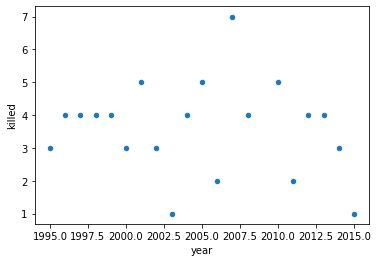

In [43]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ava95.groupby('year').sum().reset_index().plot.scatter(x='year', y='killed', ax=ax)

What we did here is we first group the data by the "year" column, then we sum across all the numberic columns. We reset the index to return the "year" into the data, and plot that against the kill counts.

We can make this prettier by using the Seaborn package, which is similar to PyPlot/Matplotlib, but with more functionality and aesthtics:

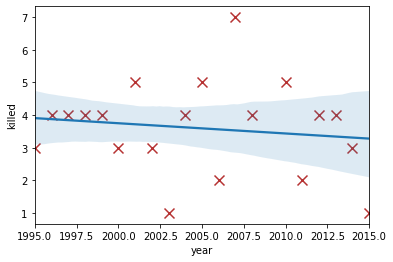

In [45]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)
summed = ava95.groupby('year').sum().reset_index()
sns.regplot(x='year', y='killed', data=summed, lowess=0, marker='x', scatter_kws={'s': 100, 'color': '#a40000'})

Let's build some quick barplots for comparison:

In [49]:
ava95.loc[:, 'Trigger'].value_counts()

Snowmobiler    25
Skier          14
Snowboarder    12
Natural         3
Unknown         3
Hiker           2
Snowshoer       1
Name: Trigger, dtype: int64

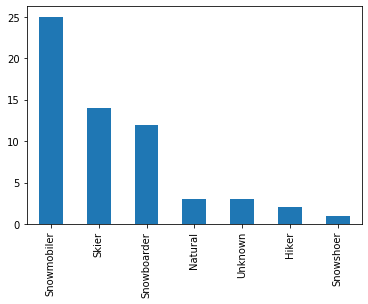

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ava95.loc[:, 'Trigger'].value_counts().plot.bar(ax=ax)

Pandas/matplotlib will not be able to plot the data unless they are in numerical form. If they aren't, we'll have to convert them:

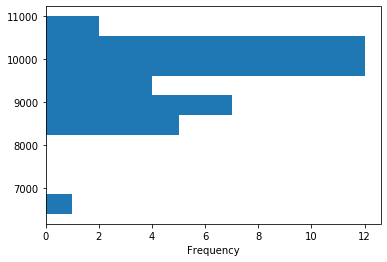

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
pd.to_numeric(ava95.loc[:, 'Elevation'], errors='coerce').plot.hist(orientation='horizontal', ax=ax)

With a few more steps, we can plot a graph of the slopes where the snow slid:

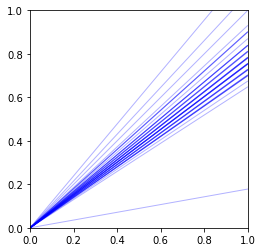

In [59]:
import math
import random


def to_rad(d):
    return d * math.pi / 180


fig = plt.figure()
ax = fig.add_subplot(111)
for i, row in df.iterrows():
    jitter = (random.random() - .5) * .2
    plt.plot([0, 1], [0, math.tan(to_rad(row['Slope Angle'] + jitter))], alpha=.3, color='blue', linewidth=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')

Or, we can plot a rose plot of the aspects in polar coordinates:

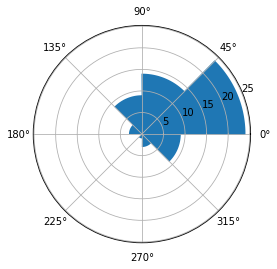

In [60]:
mapping = {'North': 90,
           'Northeast': 45,
           'East': 0,
           'Southeast': 315,
           'South': 270,
           'Southwest': 225,
           'West': 180,
           'Northwest': 135}
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
s = df.loc[:, 'Aspect'].value_counts()
items = list(s.items())
thetas = [to_rad(mapping[x[0]] - 22.5) for x in items]
radii = [x[1] for x in items]
bars = ax.bar(thetas, radii)